In [43]:
%matplotlib notebook

In [44]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st
import json
import seaborn

# Import API key
from api_keys import weather_api_key
from api_keys import api_key
from api_keys import g_key


# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)
lng_range = (-180, 180)

In [8]:
#citipy = f"https://pypi.python.org/pypi/citipy={weather_api_key}&q="
#base_url = citipy + "lompoc" + "&APPID=" + weather_api_key
#base_url

#citipy = "../output_data/citipy.py"
import citipy

In [9]:
#url= f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid={weather_api_key}&q="
#citipy = url + "lompoc" + "&APPID=" + weather_api_key
#citipy
#from citipy import citipy




## Generate Cities List

In [10]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

608

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [11]:
#Empty Lists
x=1
count=1
city_df=[]
lat=[] 
long=[]
Max_Temp=[]
Humidity=[]
Cloudiness=[]
Wind_Speed=[]
Country=[]
Date=[]


#Base line information
url= f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid={weather_api_key}&q="
city_responses= [ ]

#Beggining Print
print("Beginning Data Retrieval")
print("------------------------")

#for loop to make a api request for each city. 
for city in cities:
    if x >= 51: 
        count+= 1
        x=1
    try:
        city_data=requests.get(url + city).json()
        city_df.append(city_data['name'])
        lat.append(city_data['coord']['lat'])
        long.append(city_data['coord']['lon'])
        Max_Temp.append(city_data['main']['temp_max'])
        Humidity.append(city_data['main']["humidity"])
        Cloudiness.append(city_data["clouds"]['all'])
        Wind_Speed.append(city_data["wind"]['speed'])
        Country.append(city_data['sys']['country'])
        Date.append(city_data['dt'])
        city_responses.append(city_data)
        print(f"Processing Record {x} of set {count}|{city}")
        x+=1
    except: 
        print("City not found. Skipping... ")
        
#Final Print
print("------------------------")
print("Data Retrieval Complete ")
print("------------------------")

Beginning Data Retrieval
------------------------
Processing Record 1 of set 1|hithadhoo
Processing Record 2 of set 1|yellowknife
Processing Record 3 of set 1|saint-joseph
Processing Record 4 of set 1|cidreira
Processing Record 5 of set 1|talara
Processing Record 6 of set 1|busselton
City not found. Skipping... 
Processing Record 7 of set 1|rikitea
Processing Record 8 of set 1|atuona
Processing Record 9 of set 1|sao joao da barra
Processing Record 10 of set 1|vostok
City not found. Skipping... 
Processing Record 11 of set 1|albany
Processing Record 12 of set 1|padang
Processing Record 13 of set 1|caravelas
Processing Record 14 of set 1|norman wells
Processing Record 15 of set 1|isangel
Processing Record 16 of set 1|avarua
Processing Record 17 of set 1|hasaki
Processing Record 18 of set 1|jamestown
Processing Record 19 of set 1|punta arenas
Processing Record 20 of set 1|torbay
Processing Record 21 of set 1|korla
Processing Record 22 of set 1|longyearbyen
Processing Record 23 of set 1|le

Processing Record 49 of set 4|lubango
Processing Record 50 of set 4|yar-sale
Processing Record 1 of set 5|touros
Processing Record 2 of set 5|chernyshevsk
Processing Record 3 of set 5|chokurdakh
City not found. Skipping... 
Processing Record 4 of set 5|berlevag
Processing Record 5 of set 5|fallingbostel
Processing Record 6 of set 5|villa bruzual
Processing Record 7 of set 5|dargaville
Processing Record 8 of set 5|chegdomyn
Processing Record 9 of set 5|paamiut
Processing Record 10 of set 5|dyersburg
Processing Record 11 of set 5|kruisfontein
Processing Record 12 of set 5|salinas
Processing Record 13 of set 5|mana
Processing Record 14 of set 5|santa isabel do rio negro
Processing Record 15 of set 5|aksarayskiy
Processing Record 16 of set 5|moree
Processing Record 17 of set 5|fairlie
Processing Record 18 of set 5|alice springs
Processing Record 19 of set 5|male
Processing Record 20 of set 5|koumac
Processing Record 21 of set 5|bolu
Processing Record 22 of set 5|novoagansk
Processing Recor

Processing Record 43 of set 8|boa vista
Processing Record 44 of set 8|klaksvik
Processing Record 45 of set 8|dalvik
Processing Record 46 of set 8|kaeo
Processing Record 47 of set 8|dubbo
Processing Record 48 of set 8|ust-charyshskaya pristan
Processing Record 49 of set 8|vytegra
Processing Record 50 of set 8|honningsvag
Processing Record 1 of set 9|nizwa
Processing Record 2 of set 9|onalaska
Processing Record 3 of set 9|wakkanai
Processing Record 4 of set 9|kolobovo
Processing Record 5 of set 9|paro
Processing Record 6 of set 9|camabatela
Processing Record 7 of set 9|waitara
Processing Record 8 of set 9|wuwei
Processing Record 9 of set 9|masumbwe
Processing Record 10 of set 9|imphal
Processing Record 11 of set 9|marsa matruh
City not found. Skipping... 
Processing Record 12 of set 9|fort nelson
Processing Record 13 of set 9|mount isa
Processing Record 14 of set 9|estevan
City not found. Skipping... 
Processing Record 15 of set 9|hambantota
Processing Record 16 of set 9|awjilah
City not

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [30]:
#Make into a DataFrame

main_df=pd.DataFrame({"City": city_df, "Lat": lat, "Lng": long, 
                      "Max Temp": Max_Temp, "Humidity": Humidity, 
                      "Cloudiness":Cloudiness, "Wind Speed": Wind_Speed,
                     "Country": Country, "Date": Date})

main_df.head(5)


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hithadhoo,-0.6000,73.0833,81.34,71,92,7.78,MV,1627858049
1,Yellowknife,62.4560,-114.3525,87.33,28,20,3.44,CA,1627858059
2,Saint-Joseph,-21.3667,55.6167,64.78,75,37,8.30,RE,1627858292
3,Cidreira,-30.1811,-50.2056,56.86,93,90,8.03,BR,1627858086
4,Talara,-4.5772,-81.2719,65.91,84,1,21.12,PE,1627858137


In [31]:

#Count each column to ensure that they are equal

main_df.count()

City          564
Lat           564
Lng           564
Max Temp      564
Humidity      564
Cloudiness    564
Wind Speed    564
Country       564
Date          564
dtype: int64

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [32]:
#There is no data where humidity is over 100%
main_df["Humidity"].max()

#This is how I would create the dataframe though

main_df=main_df[main_df["Humidity"]<= 100]

main_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,5.640000e+02
mean,20.572110,17.987070,69.294504,69.907801,52.179078,7.492606,1.627858e+09
std,32.803396,88.959545,13.996581,22.095755,38.132398,5.296729,9.359281e+01
min,-54.800000,-179.166700,33.730000,10.000000,0.000000,0.000000,1.627858e+09
25%,-4.616225,-60.487425,57.637500,56.750000,13.000000,3.552500,1.627858e+09
50%,24.791700,24.572600,71.375000,75.000000,57.000000,6.130000,1.627858e+09
75%,46.959525,93.527350,79.247500,87.000000,90.000000,10.217500,1.627858e+09
max,78.218600,179.316700,106.320000,100.000000,100.000000,29.930000,1.627858e+09


In [33]:
#  Get the indices of cities that have humidity over 100%.
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

main_df.to_csv(output_data_file, index_label= "city_id")

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

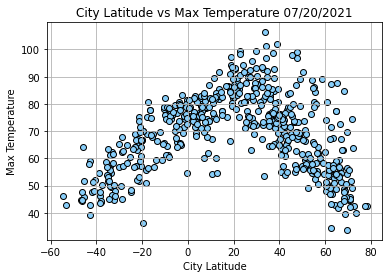

In [34]:
#New (x,y) Variables
latitude=main_df["Lat"]
Max_T=main_df["Max Temp"]

#Making Scatter Plot
plt.scatter(latitude, Max_T, marker="o", facecolors="lightskyblue", edgecolors="black")

#Formatting
plt.grid()
plt.title("City Latitude vs Max Temperature 07/20/2021")
plt.xlabel("City Latitude")
plt.ylabel("Max Temperature")
plt.savefig("Fig1.png")
plt.show()

## Latitude vs. Humidity Plot

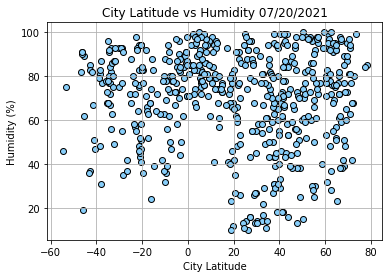

In [35]:
#New (y) variable
Humidity_data=main_df["Humidity"]

#Making Scatter Plot
plt.scatter(latitude, Humidity_data, marker="o", facecolors="lightskyblue", edgecolors="black")

#Formatting
plt.grid()
plt.title("City Latitude vs Humidity 07/20/2021")
plt.xlabel("City Latitude")
plt.ylabel("Humidity (%)")

#Saving the graph to a PNG
plt.savefig("Fig2.png")
plt.show()

## Latitude vs. Cloudiness Plot

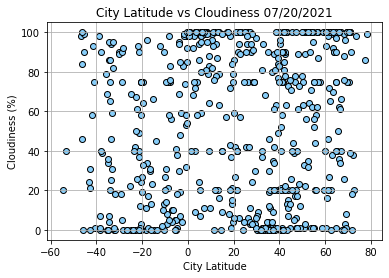

In [36]:
#New (y) variable
Cloud_data=main_df["Cloudiness"]

#Making Scatter Plot
plt.scatter(latitude, Cloud_data, marker="o", facecolors="lightskyblue", edgecolors="black")

#Formatting
plt.grid()
plt.title("City Latitude vs Cloudiness 07/20/2021")
plt.xlabel("City Latitude")
plt.ylabel("Cloudiness (%)")

#Saving the graph to a PNG
plt.savefig("Fig3.png")
plt.show()

## Latitude vs. Wind Speed Plot

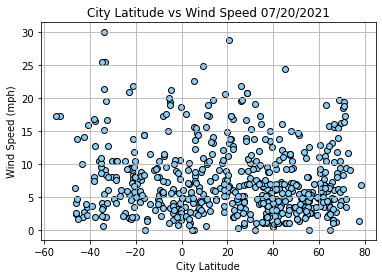

In [37]:
#New (y) variable
Wind_data=main_df["Wind Speed"]

#Making Scatter Plot
plt.scatter(latitude, Wind_data, marker="o", facecolors="lightskyblue", edgecolors="black")

#Formatting
plt.grid()
plt.title("City Latitude vs Wind Speed 07/20/2021")
plt.xlabel("City Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("Fig4.png")
plt.show()

## Linear Regression

In [38]:
# Create Northern and Southern Hemisphere DataFrames
Northern_df=main_df[main_df["Lat"]>0]
Southern_df=main_df[main_df["Lat"]<0]

In [39]:
#Practice
def plot_linear_regression(x,y,title,text_coordinates):
    (slope, intercept,rvalue, pvalue, stderr)= linregress(x,y)
    regress_values= x*slope + intercept
    line_eq=f"y={round(slope,2)}x + {round(intercept,2)}"
    plt.scatter(x, y, marker="o", facecolors="lightskyblue", edgecolors="black")
    plt.plot(x, regress_values, color='red')
    plt.annotate(line_eq, text_coordinates, color='red', fontsize= 14)
    plt.xlabel("Latitude")
    plt.ylabel(title)
    plt.show()
    print(f"The r-squared is: {rvalue**2}")

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

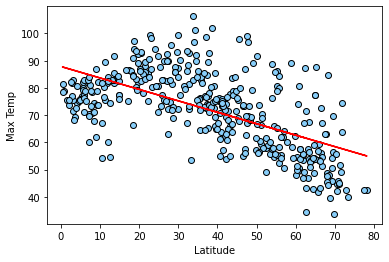

The r-squared is: 0.36646862525292573


In [40]:
plot_linear_regression(Northern_df["Lat"], Northern_df["Max Temp"], "Max Temp",(10,20))

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

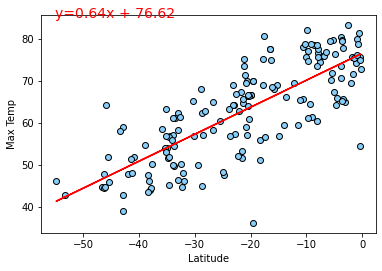

The r-squared is: 0.6185299078783585


In [41]:
plot_linear_regression(Southern_df["Lat"], Southern_df["Max Temp"], "Max Temp",(-55,85))

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

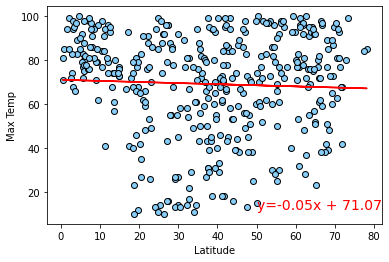

The r-squared is: 0.0019006378208706008


In [24]:
plot_linear_regression(Northern_df["Lat"], Northern_df["Humidity"], "Max Temp",(50,12))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

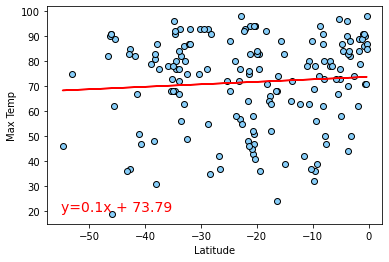

The r-squared is: 0.005707931118899284


In [25]:
plot_linear_regression(Southern_df["Lat"], Southern_df["Humidity"], "Max Temp",(-55,20))

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

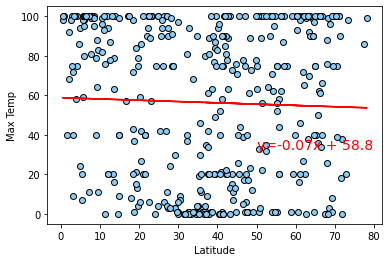

The r-squared is: 0.0012008783469701877


In [26]:
plot_linear_regression(Northern_df["Lat"], Northern_df["Cloudiness"], "Max Temp",(50,33))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

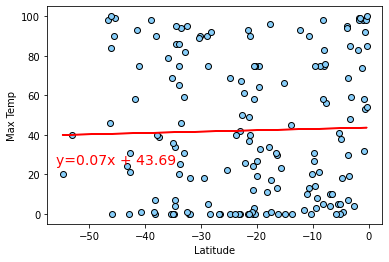

The r-squared is: 0.00071232046581624


In [27]:
plot_linear_regression(Southern_df["Lat"], Southern_df["Cloudiness"], "Max Temp",(-56,25))

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

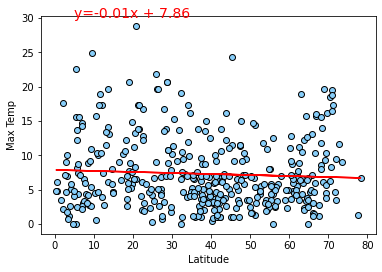

The r-squared is: 0.0034839170024733553


In [28]:
plot_linear_regression(Northern_df["Lat"], Northern_df["Wind Speed"], "Max Temp",(5,30))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

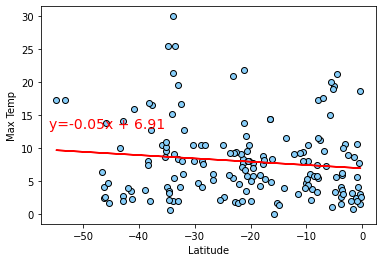

The r-squared is: 0.014980783357906402


In [29]:
plot_linear_regression(Southern_df["Lat"], Southern_df["Wind Speed"], "Max Temp",(-56,13))